In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import link_agents, distr_energy1, simulate
from plot import plot_prod_index_conlengths
import pandas as pd

#Plotting parameters
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10


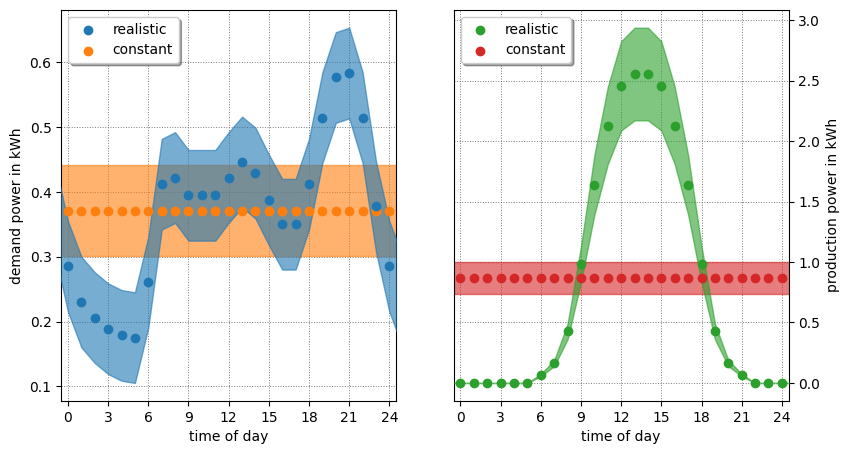

In [2]:
#import Base Profiles
df_prof = pd.read_csv('profiles.csv',index_col=False)
time = np.array(df_prof['time'].tolist())
base_demand = np.array(df_prof['realistic demand'].tolist())
base_prod = np.array(df_prof['realistic production'].tolist())
base_demand_const = np.array(df_prof['constant demand'].tolist())
base_prod_const = np.array(df_prof['constant production'].tolist())

#producer steps and connection length
prod_per = np.linspace(0.1, 1, 10)
con_lengths = np.array([100])

#profile std
demand_std = 0.07

prod_std_factor=0.15
prod_std = prod_std_factor*base_prod
prod_const = prod_std_factor*base_prod_const

#plot
time_plot=np.insert(time, [0,time.size], [-1,24])
time_plot=np.append(time_plot, 25)

base_demand_plot = np.insert(base_demand, [0,time.size], [base_demand[23],base_demand[0]])
base_demand_plot=np.append(base_demand_plot, base_demand[1])

base_prod_plot = np.insert(base_prod, [0,time.size], [base_prod[23],base_prod[0]])
base_prod_plot=np.append(base_prod_plot, base_prod[1])
prod_std_plot = prod_std_factor*base_prod_plot

base_demand_const_plot = np.insert(base_demand_const, [0,time.size], [base_demand_const[23],base_demand_const[0]])
base_demand_const_plot=np.append(base_demand_const_plot, base_demand_const[1])

base_prod_const_plot = np.insert(base_prod_const, [0,time.size], [base_prod_const[23],base_prod_const[0]])
base_prod_const_plot=np.append(base_prod_const_plot, base_prod_const[1])
prod_const_std_plot = prod_std_factor*base_prod_const_plot


fig, ax = plt.subplots(1,2, figsize=(8,4.5))
fig.tight_layout()
ax[0].scatter(time_plot, base_demand_plot, marker='o', zorder=5, label="realistic")
ax[0].fill_between(time_plot, base_demand_plot+demand_std, base_demand_plot-demand_std, alpha=0.6, color='C0', zorder=3)

ax[0].scatter(time_plot, base_demand_const_plot, marker='o', color='C1', zorder=4, label="constant")
ax[0].fill_between(time_plot, base_demand_const_plot+demand_std, base_demand_const_plot-demand_std, alpha=0.6, color='C1', zorder=2)

ax[1].scatter(time_plot, base_prod_plot, marker='o', color='C2', zorder=5, label="realistic")
ax[1].fill_between(time_plot, base_prod_plot+prod_std_plot, base_prod_plot-prod_std_plot, alpha=0.6, color='C2', zorder=3)

ax[1].scatter(time_plot, base_prod_const_plot, marker='o', color='C3', zorder=4, label="constant")
ax[1].fill_between(time_plot, base_prod_const_plot+prod_const_std_plot, base_prod_const_plot-prod_const_std_plot, alpha=0.6, color='C3', zorder=2)

ax[0].legend(shadow=True, loc='upper left')
ax[1].legend(shadow=True, loc='upper left')

ax[0].set_xlim(-0.5,24.5)
ax[1].set_xlim(-0.5,24.5)

ax[0].set_ylabel('demand power in kWh')
ax[1].set_ylabel('production power in kWh')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

ax[1].grid(color = "#595959", linestyle='dotted', lw = 0.7, alpha = 0.8)
ax[0].grid(color = "#595959", linestyle='dotted', lw = 0.7, alpha = 0.8)

ax[0].set_xticks([0,3,6,9,12,15,18,21,24])
ax[1].set_xticks([0,3,6,9,12,15,18,21,24])
ax[0].set_xlabel('time of day')
ax[1].set_xlabel('time of day')

plt.savefig('./plots_max/profiles.pdf', bbox_inches='tight')

In [3]:
links_per_real=[]
energy_loss_per_real = []
supply_per_real=[]

links_per_const=[]
energy_loss_per_const = []
supply_per_const=[]

In [4]:
#simuliere x Städte
x = 100
for i in range(x):
    temp_links_per, temp_energy_loss_per, temp_supply_per = simulate(
        link_agents, #link agents method (all agents in con_length reach)
        distr_energy1, #energy distribution method (random)
        base_demand, #base demand profile (realistic)
        base_prod,  #base production profile (realistic)
        con_lengths, #connection length (100)
        np.array([0]), #reservoir capacity (0)
        prod_per, #producer percentage steps
        np.array([0]), #reservoire percentage steps#
        demand_std = demand_std, #standard deviation of demand y axis
        production_std = prod_std, #standard deviation of prod y axis (time dependend)
        gridsize = np.array([1300, 1300]), #city size
        population = 1000 #number of agents in a city
    )
    links_per_real.append(temp_links_per)
    energy_loss_per_real.append(temp_energy_loss_per)
    supply_per_real.append(temp_supply_per)

    temp_links_per, temp_energy_loss_per, temp_supply_per = simulate(
        link_agents, #link agents method (all agents in con_length reach)
        distr_energy1, #energy distribution method (random)
        base_demand_const, #base demand profile (realistic)
        base_prod_const,  #base production profile (realistic)
        con_lengths, #connection length (100)
        np.array([0]), #reservoir capacity (0)
        prod_per, #producer percentage steps
        np.array([0]), #reservoire percentage steps#
        demand_std = demand_std, #standard deviation of demand y axis
        production_std = prod_std, #standard deviation of prod y axis (time dependend)
        gridsize = np.array([1300, 1300]), #city size
        population = 1000 #number of agents in a city
    )
    links_per_const.append(temp_links_per)
    energy_loss_per_const.append(temp_energy_loss_per)
    supply_per_const.append(temp_supply_per)
    print(str(i+1)+"/"+str(x)+' steps simulated', end='\r')
#print(supply_per)
print('\nfinished simulating')

#plot_prod_index_conlengths("test.pdf", prod_per, con_lengths, links_per[:, 0, :, 0],
#             energy_loss_per[:, 0, :, 0], supply_per[:, 0, :, 0])

100/100 steps simulated
finished simulating


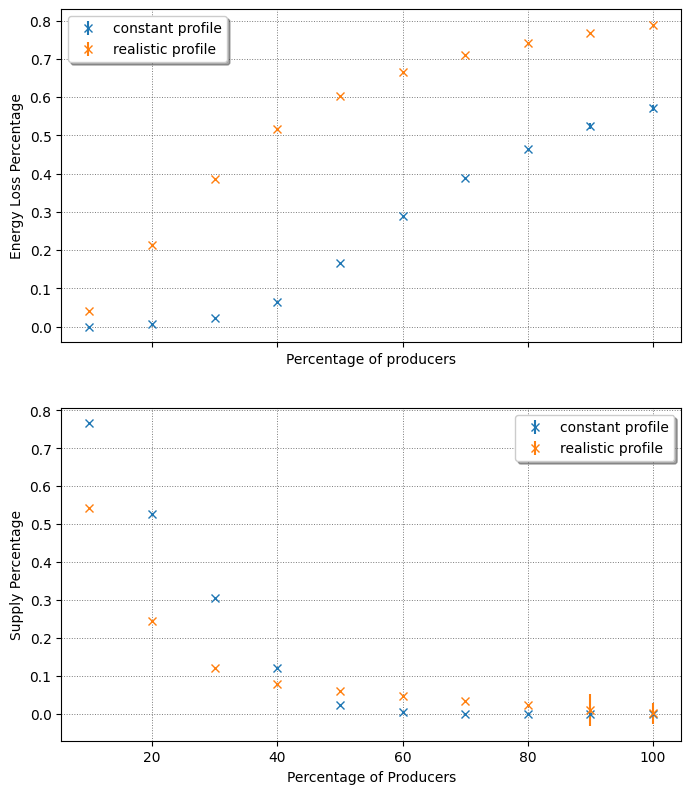

In [6]:
mean_energy_loss_per_real = np.mean(energy_loss_per_real, 0)
std_energy_loss_per_real = np.std(energy_loss_per_real, 0, ddof=1)

mean_energy_loss_per_const = np.mean(energy_loss_per_const, 0)
std_energy_loss_per_const = np.std(energy_loss_per_const, 0, ddof=1)


mean_supply_per_real = np.mean(supply_per_real, 0)
std_supply_per_real = np.std(supply_per_real, 0, ddof=1)

mean_supply_per_const = np.mean(supply_per_const, 0)
std_supply_per_const = np.std(supply_per_const, 0, ddof=1)

#print(np.transpose(std_supply_per_real[0,:][0])[0])




fig, ax = plt.subplots(2, 1, figsize=(8, 9.5), sharex=True)
ax1, ax2 = ax

ax1.errorbar(prod_per*100, np.transpose(mean_energy_loss_per_const[0,:][0])[0], yerr = np.transpose(std_energy_loss_per_const[0,:][0])[0]*10, linestyle='', marker='x', label='constant profile')
ax1.errorbar(prod_per*100, np.transpose(mean_energy_loss_per_real[0,:][0])[0], yerr = np.transpose(std_energy_loss_per_real[0,:][0])[0]*10, linestyle='', marker='x', label='realistic profile')

ax2.errorbar(prod_per*100, np.transpose(mean_supply_per_const[0,:][0])[0], yerr = np.transpose(std_supply_per_const[0,:][0])[0]*100, linestyle='', marker='x', label='constant profile')
ax2.errorbar(prod_per*100, np.transpose(mean_supply_per_real[0,:][0])[0], yerr = np.transpose(std_supply_per_real[0,:][0])[0]*100, linestyle='', marker='x', label='realistic profile')

ax1.grid(color = "#595959", linestyle='dotted', lw = 0.7, alpha = 0.8)
ax1.set_xlabel("Percentage of producers")
ax1.set_ylabel("Energy Loss Percentage")
ax1.legend(shadow=True)

ax2.grid(color = "#595959", linestyle='dotted', lw = 0.7, alpha = 0.8)
ax2.set_xlabel("Percentage of Producers")
ax2.set_ylabel("Supply Percentage")
ax2.legend(shadow=True)
plt.savefig('./plots_max/profile_comp_100.pdf', bbox_inches='tight')